**Forward Time Centred Space (FTCS)**

Forward Time Centred Space (FTCS) scheme is a method of solving heat equation. In this scheme, we approximate the spatial derivatives at the current time step and the time derivative between current and new time step.

In [42]:
import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [43]:
#Number of grids
Nx = 40; #number of grids along x direction
Nt = 7000; #number of grids along t direction 

#define the coordinates
x0 = 0;
xr = 1; 

t0 = 0;
tf = 2;

dx = (xr-x0)/(Nx-1);
dt = (tf-t0)/(Nt-1);

xspan = np.linspace(x0,xr,Nx)
tspan = np.linspace(t0,tf,Nt)

#parameter
alpha = 1;
r = dt*alpha/(dx*dx);

In [44]:
r

0.43463351907415354

In [45]:
#define a matrix
T=np.zeros((Nx,Nt))
T
#Initial condition
T[:,0]=0
#Boundary conditions
T[0,:]=100;
T[-1,:]=0;
T

array([[100., 100., 100., ..., 100., 100., 100.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [46]:
#call for interior points
for k in range(0,Nt-1):
  for i in range(1,Nx-1):
    T[i,k+1]=T[i,k]+r*(T[i+1,k]-2*T[i,k]+T[i-1,k])
T

array([[100.   , 100.   , 100.   , ..., 100.   , 100.   , 100.   ],
       [  0.   ,  43.463,  49.145, ...,  97.436,  97.436,  97.436],
       [  0.   ,   0.   ,  18.891, ...,  94.872,  94.872,  94.872],
       ...,
       [  0.   ,   0.   ,   0.   , ...,   5.128,   5.128,   5.128],
       [  0.   ,   0.   ,   0.   , ...,   2.564,   2.564,   2.564],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ]])

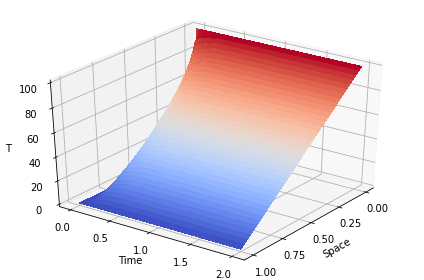

In [49]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T1, T, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticks([0, 0.5, 1, 1.5, 2])
ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_zlabel('T')

ax.view_init(elev=33, azim=36)
plt.tight_layout()
plt.show()

**Backward Time Centered Space (BTCS) method**

The BTCS scheme is another method of solving the heat equation. It is unconditionally stable for the heat equation

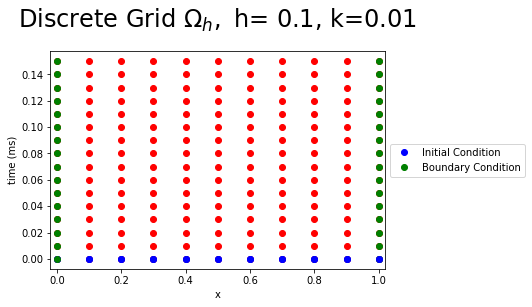

In [50]:
#Discrete Grid
N=10
Nt=100
h=1/N
k=1/Nt
r=k/(h*h)
time_steps=15
time=np.arange(0,(time_steps+.5)*k,k)
x=np.arange(0,1.0001,h)
X, Y = np.meshgrid(x, time)
fig = plt.figure()
plt.plot(X,Y,'ro');
plt.plot(x,0*x,'bo',label='Initial Condition');
plt.plot(np.ones(time_steps+1),time,'go',label='Boundary Condition');
plt.plot(x,0*x,'bo');
plt.plot(0*time,time,'go');
plt.xlim((-0.02,1.02))
plt.xlabel('x')
plt.ylabel('time (ms)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Discrete Grid $\Omega_h,$ h= %s, k=%s'%(h,k),fontsize=24,y=1.08)
plt.show();

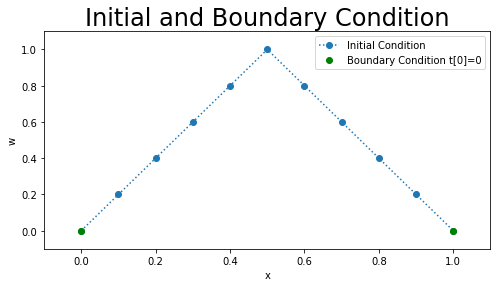

In [52]:
#Discrete Initial and Boundary Conditions
w=np.zeros((N+1,time_steps+1))
b=np.zeros(N-1)
# Initial Condition
for i in range (1,N):
    w[i,0]=2*x[i]
    if x[i]>0.5:
        w[i,0]=2*(1-x[i])
    

# Boundary Condition
for k in range (0,time_steps):
    w[0,k]=0
    w[N,k]=0

fig = plt.figure(figsize=(8,4))
plt.plot(x,w[:,0],'o:',label='Initial Condition')
plt.plot(x[[0,N]],w[[0,N],0],'go',label='Boundary Condition t[0]=0')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Initial and Boundary Condition',fontsize=24)
plt.xlabel('x')
plt.ylabel('w')
plt.legend(loc='best')
plt.show()

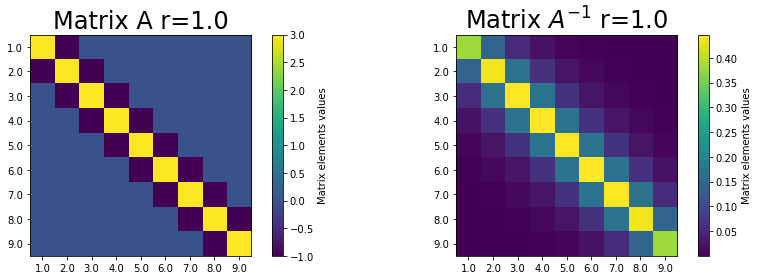

In [55]:
#Implicit Backward Time Centered Space (BTCS) Difference Equation
A=np.zeros((N-1,N-1))
for i in range (0,N-1):
    A[i,i]=1+2*r

for i in range (0,N-2):           
    A[i+1,i]=-r
    A[i,i+1]=-r
    
Ainv=np.linalg.inv(A)   
fig = plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(A,interpolation='none')
plt.xticks(np.arange(N-1), np.arange(1,N-0.9,1))
plt.yticks(np.arange(N-1), np.arange(1,N-0.9,1))
clb=plt.colorbar()
clb.set_label('Matrix elements values')
plt.title('Matrix A r=%s'%(np.round(r,3)),fontsize=24)

plt.subplot(122)
plt.imshow(Ainv,interpolation='none')
plt.xticks(np.arange(N-1), np.arange(1,N-0.9,1))
plt.yticks(np.arange(N-1), np.arange(1,N-0.9,1))
clb=plt.colorbar()
clb.set_label('Matrix elements values')
#clb.set_clim((-1,1));
plt.title(r'Matrix $A^{-1}$ r=%s'%(np.round(r,3)),fontsize=24)

fig.tight_layout()
plt.show()

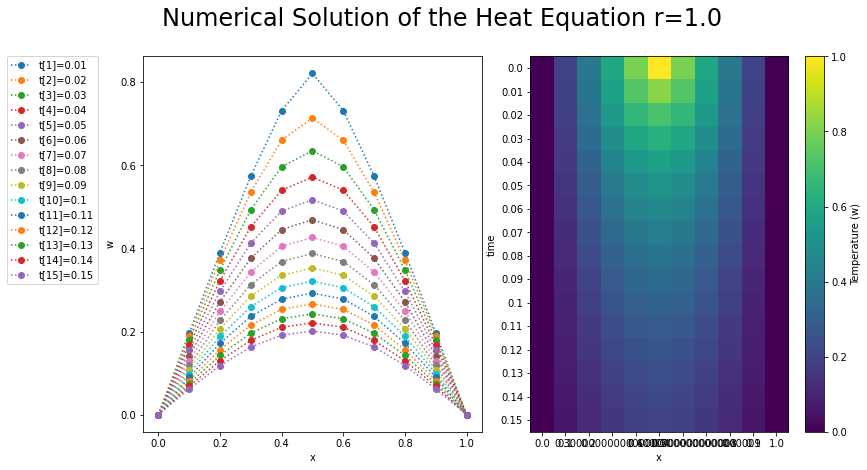

In [56]:
#Numerical Solution of teh Heat Equation
fig = plt.figure(figsize=(12,6))

plt.subplot(121)
for j in range (1,time_steps+1):
    b[0]=r*w[0,j]
    b[N-2]=r*w[N,j]
    w[1:(N),j]=np.dot(Ainv,w[1:(N),j-1]+b)
    plt.plot(x,w[:,j],'o:',label='t[%s]=%s'%(j,time[j]))
plt.xlabel('x')
plt.ylabel('w')
#plt.legend(loc='bottom', bbox_to_anchor=(0.5, -0.1))
plt.legend(bbox_to_anchor=(-.4, 1), loc=2, borderaxespad=0.)

plt.subplot(122)
plt.imshow(w.transpose())
plt.xticks(np.arange(len(x)), x)
plt.yticks(np.arange(len(time)), time)
plt.xlabel('x')
plt.ylabel('time')
clb=plt.colorbar()
clb.set_label('Temperature (w)')
plt.suptitle('Numerical Solution of the Heat Equation r=%s'%(np.round(r,3)),fontsize=24,y=1.08)
fig.tight_layout()
plt.show()

**Crank-Nicolson Method**

The Crank-Nicolson method is a well-known finite difference method for the numerical integration of the heat equation and closely related partial differential equations.

We often resort to a Crank-Nicolson (CN) scheme when we integrate numerically reaction-diffusion systems in one space dimension

In [61]:
from matplotlib import pyplot
np.set_printoptions(precision=3)
L = 1.
J = 100
dx = float(L)/float(J-1)
x_grid = np.array([j*dx for j in range(J)])
T = 200
N = 1000
dt = float(T)/float(N-1)
t_grid = np.array([n*dt for n in range(N)])

In [63]:
#Specify System Parameters and the Reaction Term
D_v = float(10.)/float(100.)
D_u = 0.01 * D_v

k0 = 0.067
f = lambda u, v: dt*(v*(k0 + float(u*u)/float(1. + u*u)) - u)
g = lambda u, v: -f(u,v)
 
sigma_u = float(D_u*dt)/float((2.*dx*dx))
sigma_v = float(D_v*dt)/float((2.*dx*dx))

r = 2.26

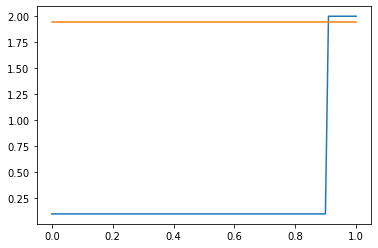

In [64]:
#Specify the Initial Condition
no_high = 10
U = np.array([0.1 for i in range(no_high,J)] + [2. for i in range(0,no_high)])
V = np.array([float(r-dx*sum(U))/float(J*dx) for i in range(0,J)])
pyplot.plot(x_grid, U)
pyplot.plot(x_grid, V)
pyplot.show()

In [65]:
#Create Matrices
A_u = np.diagflat([-sigma_u for i in range(J-1)], -1) +\
      np.diagflat([1.+sigma_u]+[1.+2.*sigma_u for i in range(J-2)]+[1.+sigma_u]) +\
      np.diagflat([-sigma_u for i in range(J-1)], 1)
        
B_u = np.diagflat([sigma_u for i in range(J-1)], -1) +\
      np.diagflat([1.-sigma_u]+[1.-2.*sigma_u for i in range(J-2)]+[1.-sigma_u]) +\
      np.diagflat([sigma_u for i in range(J-1)], 1)
        
A_v = np.diagflat([-sigma_v for i in range(J-1)], -1) +\
      np.diagflat([1.+sigma_v]+[1.+2.*sigma_v for i in range(J-2)]+[1.+sigma_v]) +\
      np.diagflat([-sigma_v for i in range(J-1)], 1)
        
B_v = np.diagflat([sigma_v for i in range(J-1)], -1) +\
      np.diagflat([1.-sigma_v]+[1.-2.*sigma_v for i in range(J-2)]+[1.-sigma_v]) +\
      np.diagflat([sigma_v for i in range(J-1)], 1)
print(A_u)

[[ 1.981 -0.981  0.    ...  0.     0.     0.   ]
 [-0.981  2.962 -0.981 ...  0.     0.     0.   ]
 [ 0.    -0.981  2.962 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  2.962 -0.981  0.   ]
 [ 0.     0.     0.    ... -0.981  2.962 -0.981]
 [ 0.     0.     0.    ...  0.    -0.981  1.981]]


In [66]:
#Solve the System Iteratively
f_vec = lambda U, V: np.multiply(dt, np.subtract(np.multiply(V, np.add(k0, np.divide(np.multiply(U,U), np.add(1., np.multiply(U,U))))), U))
print(f_vec(U, V))

[ 0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01
  0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01
  0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01
  0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01
  0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01
  0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01
  0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01
  0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01
  0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01
 -0.062 -0.062 -0.062 -0.062 -0.062 -0.062 -0.062 -0.062 -0.062 -0.062]


In [67]:
U_record = []
V_record = []

U_record.append(U)
V_record.append(V)

for ti in range(1,N):
    U_new = np.linalg.solve(A_u, B_u.dot(U) + f_vec(U,V))
    V_new = np.linalg.solve(A_v, B_v.dot(V) - f_vec(U,V))
    
    U = U_new
    V = V_new
    
    U_record.append(U)
    V_record.append(V)

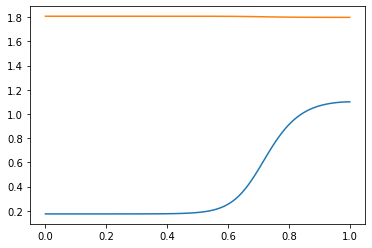

In [68]:
#Plot the Numerical Solution
pyplot.plot(x_grid, U)
pyplot.plot(x_grid, V)
pyplot.show()